In [1]:
!! cd

['C:\\Users\\nagal\\demo\\loan']

In [2]:
! cd

C:\Users\nagal\demo\loan


In [3]:
!!cd

['C:\\Users\\nagal\\demo\\loan']

# CLASSIFICATION CASE STUDY - WHETHER TO GRANT LOAN OR NOT

### IMPORT LIBRARIES

In [4]:
# IMPORTING REQUIRED PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = "dark")

### LOAD DATA

In [5]:
# READ DATA FROM CSV FILE
train = pd.read_csv("loan_train.csv")

In [6]:
train.shape

(614, 13)

In [7]:
# FEATURES IN DATASET
train.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus'],
      dtype='object')

### UNDERSTAND DATA

In [8]:
train.sample(5)

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
481,LP002536,Male,Yes,3+,Not Graduate,No,3095,0.0,113.0,360.0,1.0,Rural,Y
198,LP001671,Female,Yes,0,Graduate,No,3416,2816.0,113.0,360.0,NaN,Semiurban,Y
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
520,LP002689,Male,Yes,2,Not Graduate,No,2192,1742.0,45.0,360.0,1.0,Semiurban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   SelfEmployed       582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   LoanAmountTerm     600 non-null    float64
 10  CreditHistory      564 non-null    float64
 11  PropertyArea       614 non-null    object 
 12  LoanStatus         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
train.LoanAmountTerm.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: LoanAmountTerm, dtype: int64

In [11]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
train[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "LoanAmountTerm"]].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [13]:
train[["Gender", "Married", "Dependents", "Education", "SelfEmployed", "PropertyArea"]].describe()

,Gender,Married,Dependents,Education,SelfEmployed,PropertyArea
count,601,611,599,614,582,614
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Semiurban
freq,489,398,345,480,500,233


In [14]:
train[["Gender", "Married", "Dependents", "Education", "SelfEmployed", "PropertyArea"]].describe(include = "all")

,Gender,Married,Dependents,Education,SelfEmployed,PropertyArea
count,601,611,599,614,582,614
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Semiurban
freq,489,398,345,480,500,233


In [15]:
train.isnull().sum()  # COUNT NUMBER OF NULL VALUES FOR EACH COLUMN

LoanID                0
Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
CreditHistory        50
PropertyArea          0
LoanStatus            0
dtype: int64

# UNIVARIATE ANALYSIS

### UNIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES

In [16]:
train[["LoanStatus"]].value_counts()

LoanStatus
Y             422
N             192
dtype: int64

In [17]:
# NORMALIZE CAN BE SET TO TRUE TO PRINT PORTIONS INSTEAD OF NUMBER
train[["LoanStatus"]].value_counts(normalize = True)

LoanStatus
Y             0.687296
N             0.312704
dtype: float64

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

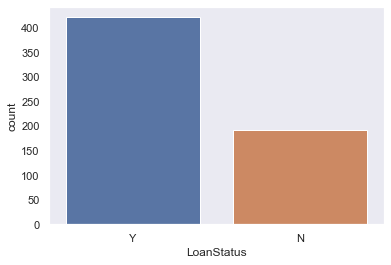

In [18]:
# BAR GRAPH FOR LOAN STATUS
sns.countplot(x = "LoanStatus", data = train)

<AxesSubplot:xlabel='Gender', ylabel='count'>

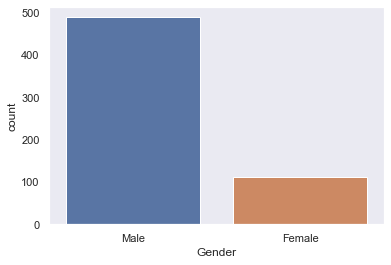

In [19]:
# BAR GRAPH FOR GENDER
sns.countplot(x = "Gender", data = train)

In [20]:
train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [21]:
train["Dependents"].fillna("NA").value_counts()

0     345
1     102
2     101
3+     51
NA     15
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

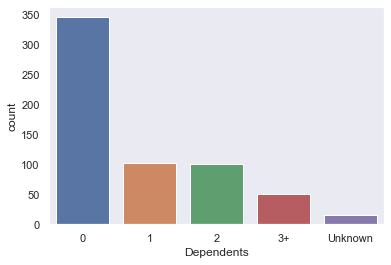

In [22]:
# BAR GRAPH FOR DEPENDENTS
sns.countplot(x = train["Dependents"].fillna("Unknown"))

In [23]:
train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

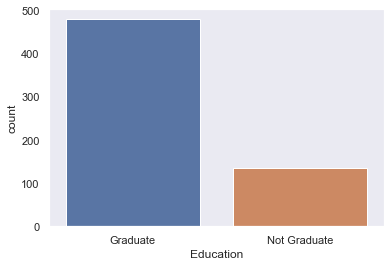

In [24]:
sns.countplot(x = "Education", data = train)

In [25]:
train["SelfEmployed"].value_counts()

No     500
Yes     82
Name: SelfEmployed, dtype: int64

In [26]:
train["SelfEmployed"].fillna("NA").value_counts()

No     500
Yes     82
NA      32
Name: SelfEmployed, dtype: int64

<AxesSubplot:xlabel='SelfEmployed', ylabel='count'>

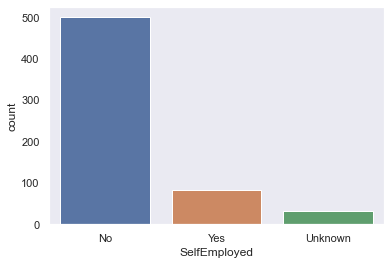

In [27]:
sns.countplot(x= train['SelfEmployed'].fillna('Unknown'))

<AxesSubplot:xlabel='SelfEmployed', ylabel='count'>

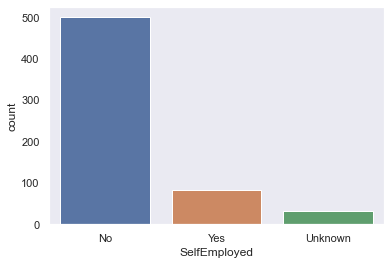

In [28]:
sns.countplot(x = train["SelfEmployed"].fillna("Unknown"))

In [29]:
train["CreditHistory"].fillna("NA").value_counts()

1.0    475
0.0     89
NA      50
Name: CreditHistory, dtype: int64

<AxesSubplot:xlabel='CreditHistory', ylabel='count'>

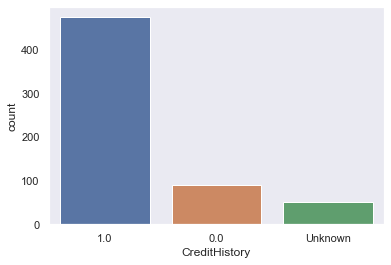

In [30]:
sns.countplot(x = train["CreditHistory"].fillna("Unknown"))

In [31]:
train["PropertyArea"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: PropertyArea, dtype: int64

In [32]:
train["PropertyArea"].fillna("NA").value_counts()

Semiurban    233
Urban        202
Rural        179
Name: PropertyArea, dtype: int64

<AxesSubplot:xlabel='PropertyArea', ylabel='count'>

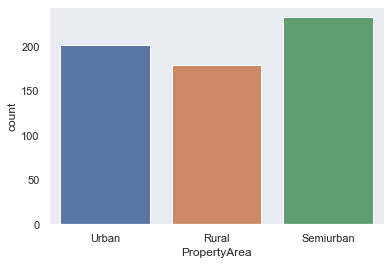

In [33]:
sns.countplot(x = train.PropertyArea.fillna("Unknown"))

In [34]:
train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [35]:
train["Married"].fillna("Unknown").value_counts()

Yes        398
No         213
Unknown      3
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

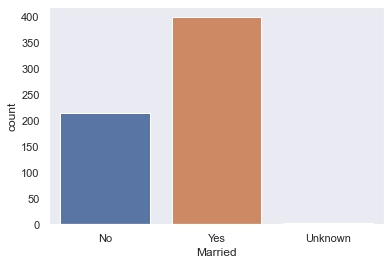

In [36]:
sns.countplot(x = train.Married.fillna("Unknown"))

In [37]:
train.pivot_table(columns = "Married", index = "Dependents", values = "LoanID")

C:\Users\nagal\AppData\Local\Temp\ipykernel_7048\960686450.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  train.pivot_table(columns = "Married", index = "Dependents", values = "LoanID")


Married
Dependents
0
1
2
3+


In [38]:
train.pivot_table(columns = "Married", index = "Dependents", values = "LoanID", aggfunc = len)

Married,No,Yes
Dependents,,
0,171,174
1,23,79
2,8,93
3+,7,44


In [39]:
train["SelfEmployed"].isnull().sum()
train["Gender"].isnull().sum()
train["Married"].isnull().sum()
train["CreditHistory"].isnull().sum()
train["Dependents"].isnull().sum()

15

In [40]:
print(train["SelfEmployed"].isnull().sum())   # MISSING COUNTS
print(train["Gender"].isnull().sum())         # MISSING COUNTS
print(train["Married"].isnull().sum())        # MISSING COUNTS
print(train["CreditHistory"].isnull().sum())  # MISSING COUNTS
print(train["Dependents"].isnull().sum())     # MISSING COUNTS

32
13
3
50
15


### UNIVARIATE ANALYSIS FOR CONTINUOUS DATA

<AxesSubplot:>

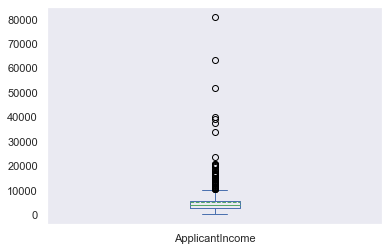

In [41]:
train["ApplicantIncome"].plot.box(showmeans = True, meanline = True, showfliers = True)

C:\Users\nagal\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='ApplicantIncome'>

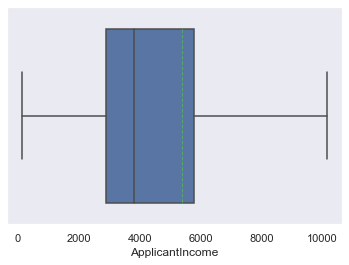

In [42]:
sns.boxplot(x="ApplicantIncome",data=train, orient='vertical', showfliers=False, meanline=True, showmeans=True, dodge = True)

### DISPLAY HOW MANY OUTLIERS IN APPLICATION INCOME

In [43]:
app_income = train["ApplicantIncome"]

In [44]:
q1, q2, q3 = app_income.quantile([0.25, 0.5, 0.75])

In [45]:
q1, q2, q3

(2877.5, 3812.5, 5795.0)

In [46]:
print(q1, q2, q3)

2877.5 3812.5 5795.0


In [47]:
iqr = q3 - q1

In [48]:
iqr

2917.5

In [49]:
print("Upper Limit     : ", (q3 + 1.5 * iqr))
print("Lower Limit     : ", (q1 - 1.5 * iqr))
print("Higher outliers : ", (app_income > (q3 + 1.5 * iqr)).sum())
print("Lower  outliers : ", (app_income < (q1 - 1.5 * iqr)).sum())

Upper Limit     :  10171.25
Lower Limit     :  -1498.75
Higher outliers :  50
Lower  outliers :  0


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

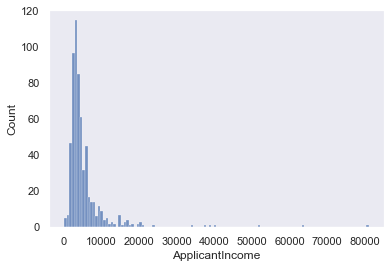

In [50]:
sns.histplot(train["ApplicantIncome"])

In [51]:
np.log(100), np.log(1000), np.log(10000)  # LOG TRANSFORMATION

(4.605170185988092, 6.907755278982137, 9.210340371976184)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

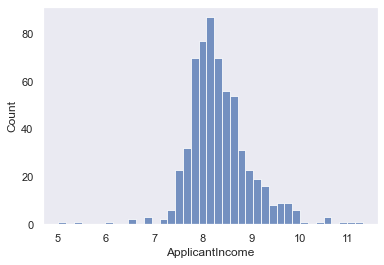

In [52]:
sns.histplot(np.log(train["ApplicantIncome"])) # AFTER LOG TRANSFORMATION

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

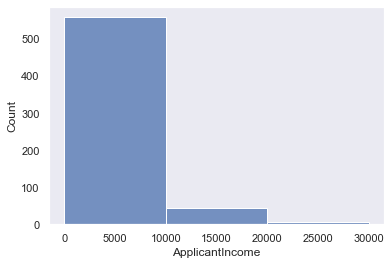

In [53]:
sns.histplot(train["ApplicantIncome"], bins = [0, 10000, 20000, 30000])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

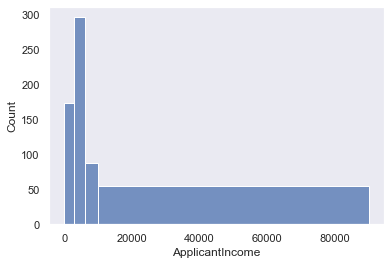

In [54]:
sns.histplot(train["ApplicantIncome"], bins = [0, 3000, 6000, 10000, 90000]) 

<AxesSubplot:>

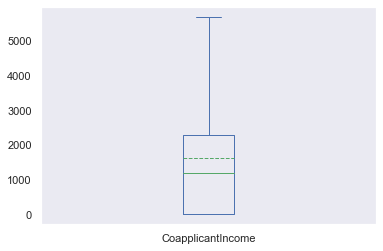

In [55]:
train.CoapplicantIncome.plot.box(showmeans = True, meanline = True, showfliers = False)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

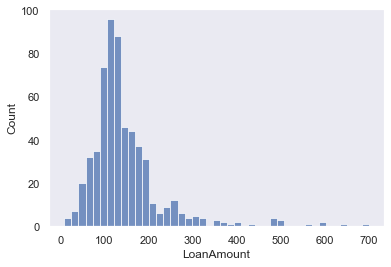

In [56]:
sns.histplot(train.LoanAmount)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

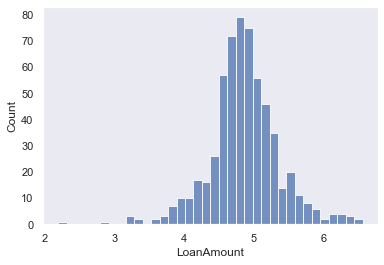

In [57]:
sns.histplot(np.log(train["LoanAmount"]))

C:\Users\nagal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

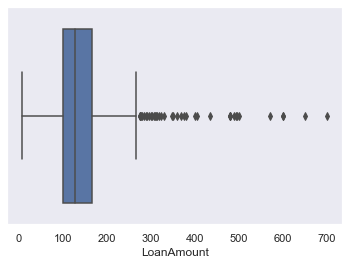

In [58]:
sns.boxplot(train["LoanAmount"])

C:\Users\nagal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

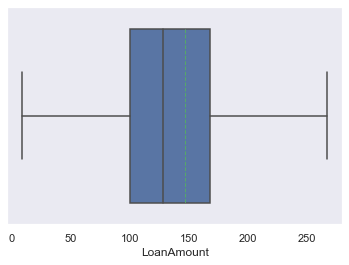

In [59]:
sns.boxplot(train["LoanAmount"], showmeans = True, meanline = True, showfliers = False)

<AxesSubplot:>

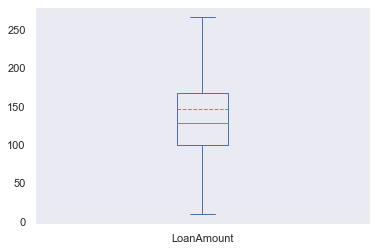

In [60]:
train.LoanAmount.plot.box(showmeans = True, meanline = True, showfliers = False)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

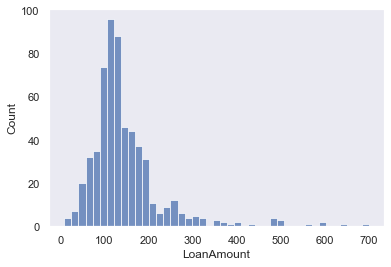

In [61]:
sns.histplot(train["LoanAmount"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

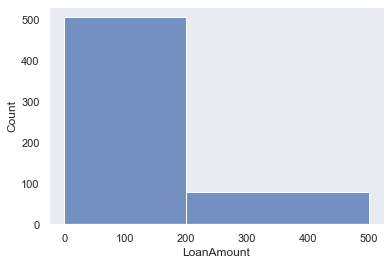

In [62]:
sns.histplot(train["LoanAmount"], bins = [0, 200, 500])

<AxesSubplot:xlabel='LoanAmountTerm', ylabel='Count'>

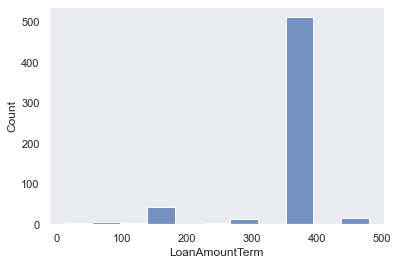

In [63]:
sns.histplot(train["LoanAmountTerm"])

In [64]:
# CONVERT MONTHS TO YEARS AND DISPLAY DIST
(train.LoanAmountTerm/12).value_counts()

30.0    512
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: LoanAmountTerm, dtype: int64

In [65]:
(train.LoanAmountTerm / 12).value_counts().sort_index()

1.0       1
3.0       2
5.0       2
7.0       4
10.0      3
15.0     44
20.0      4
25.0     13
30.0    512
40.0     15
Name: LoanAmountTerm, dtype: int64

### BIVARIATE ANALYSIS

In [66]:
property_group = train.pivot_table(index = "PropertyArea", columns = "LoanStatus", values = "LoanID", aggfunc = len)

In [67]:
property_group

LoanStatus,N,Y
PropertyArea,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [68]:
train["PropertyArea"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: PropertyArea, dtype: int64

In [69]:
# REJECTION RATE
property_group.iloc[:, 0]

PropertyArea
Rural        69
Semiurban    54
Urban        69
Name: N, dtype: int64

In [70]:
property_group.iloc[:, 0] / (property_group.iloc[:, 0])

PropertyArea
Rural        1.0
Semiurban    1.0
Urban        1.0
Name: N, dtype: float64

In [71]:
property_group.iloc[:, 0] / (property_group.iloc[:, 0] + property_group.iloc[:, 1])

PropertyArea
Rural        0.385475
Semiurban    0.231760
Urban        0.341584
dtype: float64

In [72]:
# ACCEPTANCE RATE
property_group.iloc[:, 1] / (property_group.iloc[:, 1] + property_group.iloc[:, 0])

PropertyArea
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
dtype: float64

In [73]:
train.groupby(["PropertyArea", "LoanStatus"])["LoanID"].count()

PropertyArea  LoanStatus
Rural         N              69
              Y             110
Semiurban     N              54
              Y             179
Urban         N              69
              Y             133
Name: LoanID, dtype: int64

In [74]:
train.groupby(["PropertyArea", "LoanStatus"]).count()

LoanID  Gender  Married  Dependents  Education  \
PropertyArea LoanStatus                                                   
Rural        N               69      67       69          68         69   
             Y              110     108      110         109        110   
Semiurban    N               54      52       54          52         54   
             Y              179     175      177         175        179   
Urban        N               69      68       69          66         69   
             Y              133     131      132         129        133   

                         SelfEmployed  ApplicantIncome  CoapplicantIncome  \
PropertyArea LoanStatus                                                     
Rural        N                     66               69                 69   
             Y                    103              110                110   
Semiurban    N                     52               54                 54   
             Y                    171              179                179   
Urban        N                     65               69                 69   
             Y                    125              133                133   

                         LoanAmount  LoanAmountTerm  CreditHistory  
PropertyArea LoanStatus                                             
Rural        N                   66              67             65  
             Y                  107             108            100  
Semiurban    N                   53              53             49  
             Y                  175             177            168  
Urban        N                   62              66             65  
             Y                  129             129            117

In [75]:
train.groupby(["Gender", "Education"], as_index = False)["ApplicantIncome"].count()

,Gender,Education,ApplicantIncome
0,Female,Graduate,92
1,Female,Not Graduate,20
2,Male,Graduate,376
3,Male,Not Graduate,113


In [76]:
train.groupby(["Gender", "Education"], as_index = False)["ApplicantIncome"].mean()

,Gender,Education,ApplicantIncome
0,Female,Graduate,4646.467391
1,Female,Not Graduate,4629.700000
2,Male,Graduate,5992.345745
3,Male,Not Graduate,3630.061947


<AxesSubplot:xlabel='Married', ylabel='count'>

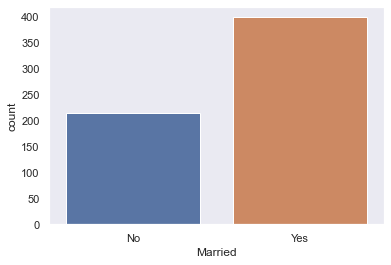

In [77]:
sns.countplot(x = "Married", data = train)

<AxesSubplot:xlabel='Married', ylabel='count'>

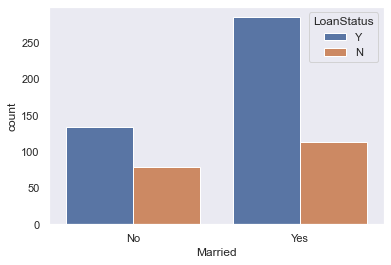

In [78]:
sns.countplot(x = "Married", hue = "LoanStatus", data = train)

In [79]:
train.pivot_table(index = "Married", columns = "LoanStatus", values = "LoanID")

C:\Users\nagal\AppData\Local\Temp\ipykernel_7048\374125537.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  train.pivot_table(index = "Married", columns = "LoanStatus", values = "LoanID")


LoanStatus
Married
No
Yes


In [80]:
train.pivot_table(index = "Married", columns = "LoanStatus", values = "LoanID", aggfunc = len)

LoanStatus,N,Y
Married,,
No,79,134
Yes,113,285


In [81]:
# MARRIED VS UNMARRIED REJECTION RATE
(113 / (113 + 285)), (79 / (79 + 134))

(0.28391959798994976, 0.37089201877934275)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

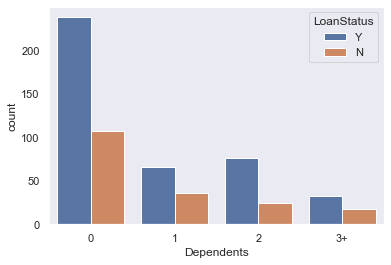

In [82]:
sns.countplot(x = "Dependents", hue = "LoanStatus", data = train)

In [83]:
d = train.groupby(["LoanStatus", "SelfEmployed"], as_index = False)["LoanID"].count()

In [84]:
d

,LoanStatus,SelfEmployed,LoanID
0,N,No,157
1,N,Yes,26
2,Y,No,343
3,Y,Yes,56


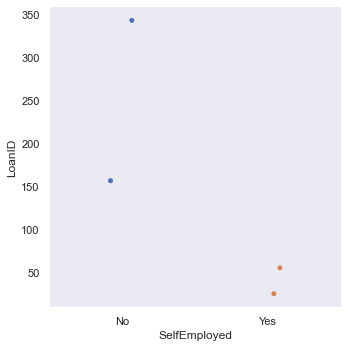

In [85]:
sns.catplot(x = "SelfEmployed", y = "LoanID", data = d)

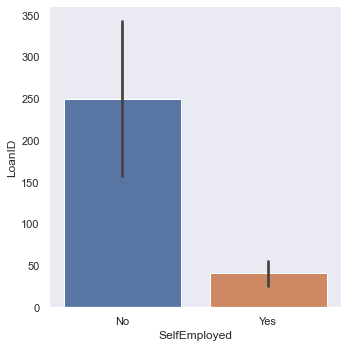

In [86]:
sns.catplot(x = "SelfEmployed", y = "LoanID", data = d, kind = "bar")

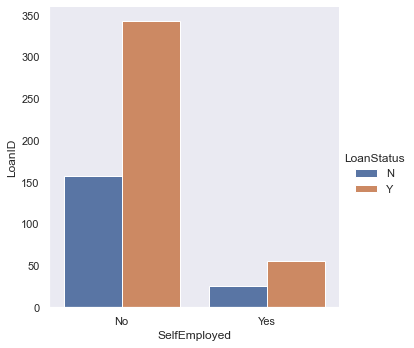

In [87]:
sns.catplot(x = "SelfEmployed", y = "LoanID", hue = "LoanStatus", data = d, kind = "bar")

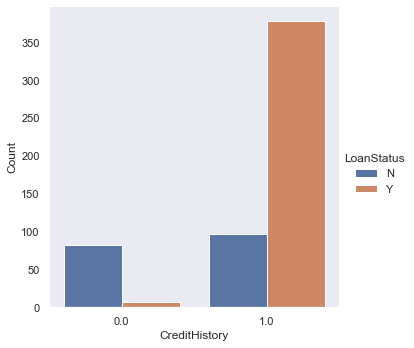

In [88]:
d = train.groupby(["LoanStatus","CreditHistory"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
sns.catplot(x="CreditHistory",y="Count", hue="LoanStatus", data=d, kind="bar")

In [89]:
d = train.groupby(["LoanStatus","CreditHistory"], as_index=False)['LoanID'].count()
d

,LoanStatus,CreditHistory,LoanID
0,N,0.0,82
1,N,1.0,97
2,Y,0.0,7
3,Y,1.0,378


In [90]:
d = train.groupby(["LoanStatus","CreditHistory"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)

In [91]:
d

,LoanStatus,CreditHistory,Count
0,N,0.0,82
1,N,1.0,97
2,Y,0.0,7
3,Y,1.0,378


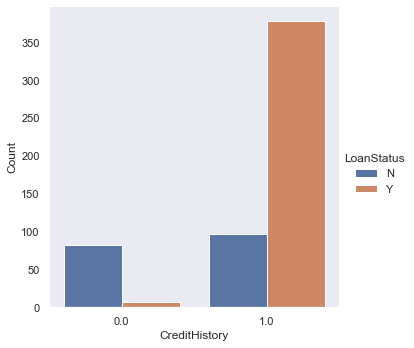

In [92]:
d = train.groupby(["LoanStatus","CreditHistory"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
sns.catplot(x="CreditHistory",y="Count", hue="LoanStatus", data=d, kind="bar")

In [93]:
d = train.groupby(by = ["LoanStatus", "CreditHistory"], as_index = False)["LoanID"].count()
d.rename(columns = {"LoanID" : "Count"}, inplace = True)
d

,LoanStatus,CreditHistory,Count
0,N,0.0,82
1,N,1.0,97
2,Y,0.0,7
3,Y,1.0,378


  LoanStatus PropertyArea  Count
0          N        Rural     69
1          N    Semiurban     54
2          N        Urban     69
3          Y        Rural    110
4          Y    Semiurban    179
5          Y        Urban    133


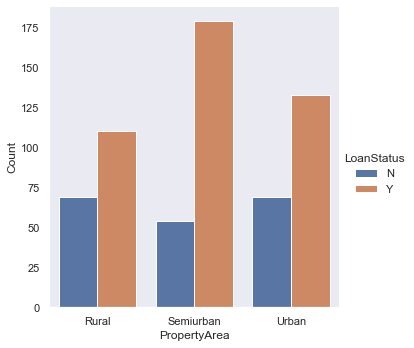

In [94]:
d = train.groupby(by=["LoanStatus","PropertyArea"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
print(d)
sns.catplot(x="PropertyArea",y="Count", hue="LoanStatus", data=d, kind='bar')

In [95]:
d = train.groupby(["LoanStatus", "Gender"], as_index = False)["LoanID"].count()
d

,LoanStatus,Gender,LoanID
0,N,Female,37
1,N,Male,150
2,Y,Female,75
3,Y,Male,339


  LoanStatus  Gender  LoanID
0          N  Female      37
1          N    Male     150
2          Y  Female      75
3          Y    Male     339


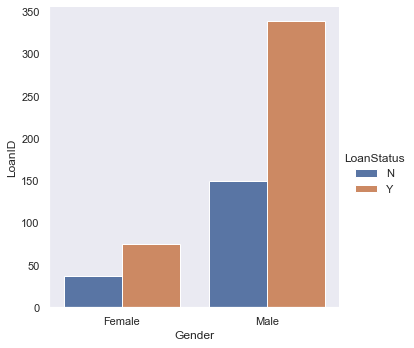

In [96]:
d = train.groupby(["LoanStatus", "Gender"], as_index = False)["LoanID"].count()
print(d)
sns.catplot(x = "Gender", y = "LoanID", hue = "LoanStatus", data = d, kind = "bar")

In [97]:
37 / 75, 150 / 339

(0.49333333333333335, 0.4424778761061947)

In [98]:
d = train.groupby(by = ["LoanStatus", "CreditHistory"], as_index = False)["LoanID"].count()
d.rename(columns = {"LoanID" : "Count"}, inplace = True)
print(d)

  LoanStatus  CreditHistory  Count
0          N            0.0     82
1          N            1.0     97
2          Y            0.0      7
3          Y            1.0    378


In [99]:
d = train.groupby(by=["LoanStatus","PropertyArea"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
print(d)

  LoanStatus PropertyArea  Count
0          N        Rural     69
1          N    Semiurban     54
2          N        Urban     69
3          Y        Rural    110
4          Y    Semiurban    179
5          Y        Urban    133


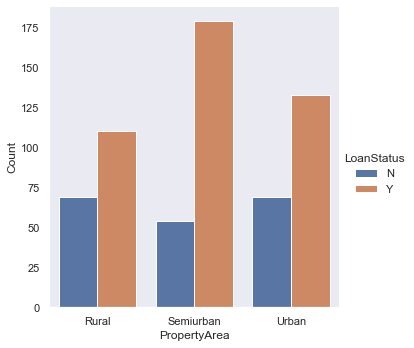

In [100]:
sns.catplot(x = "PropertyArea", y = "Count", hue = "LoanStatus", data = d, kind = "bar")

  LoanStatus PropertyArea  Count
0          N        Rural     69
1          N    Semiurban     54
2          N        Urban     69
3          Y        Rural    110
4          Y    Semiurban    179
5          Y        Urban    133


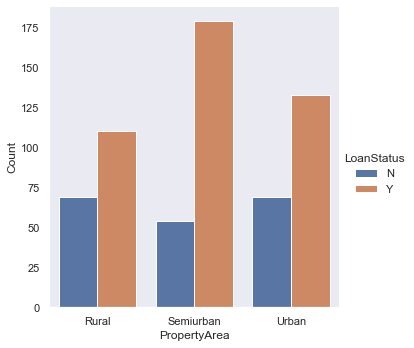

In [101]:
d = train.groupby(by=["LoanStatus","PropertyArea"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
print(d)
sns.catplot(x = "PropertyArea", y = "Count", hue = "LoanStatus", data = d, kind = "bar")

# BINNING DATA

In [102]:
# MAKING BINS FOR APPLICANT INCOME DATA
bins = [0, 2500, 4000, 6000, 85000]
group = ["Low", "Average", "High", "Very High"]

In [103]:
bins, group

([0, 2500, 4000, 6000, 85000], ['Low', 'Average', 'High', 'Very High'])

In [104]:
# MAKING BINS FOR APPLICANT INCOME DATA
bins = [0, 2500, 4000, 6000, 85000]
group = ["Low", "Average", "High", "Very High"]
# CREATE A NEW COLUMN FOR INCOME BIN
train["IncomeBin"] = pd.cut(train["ApplicantIncome"], bins, labels = group)

In [105]:
train[["ApplicantIncome", "IncomeBin"]]

,ApplicantIncome,IncomeBin
0,5849,High
1,4583,High
2,3000,Average
3,2583,Average
4,6000,High
...,...,...
609,2900,Average
610,4106,High
611,8072,Very High
612,7583,Very High


In [106]:
train[["ApplicantIncome", "IncomeBin"]].sample(10)

,ApplicantIncome,IncomeBin
130,20166,Very High
345,2499,Low
83,6000,High
109,2071,Low
602,5703,High
370,15759,Very High
417,1600,Low
452,3948,Average
588,4750,High
362,4750,High


<AxesSubplot:xlabel='IncomeBin', ylabel='count'>

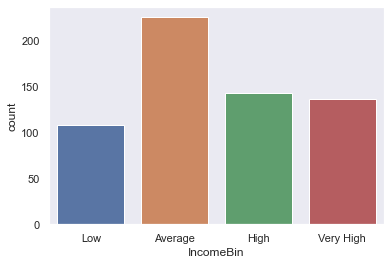

In [107]:
sns.countplot(x = "IncomeBin", data = train)

<AxesSubplot:xlabel='IncomeBin', ylabel='count'>

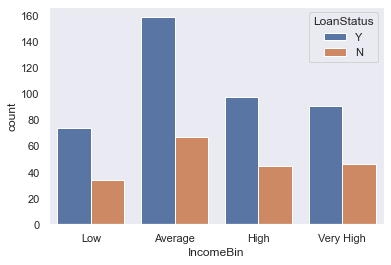

In [108]:
sns.countplot(x = "IncomeBin", hue = "LoanStatus", data = train)

In [109]:
# MAKING BINS FOR LOANAMOUNT
bins = [0, 100, 200, 600]
group = ["Low", "Average", "High"]
train["LoanAmountBin"] = pd.cut(train["LoanAmount"], bins, labels = group)
train[["LoanAmount", "LoanAmountBin"]]

,LoanAmount,LoanAmountBin
0,NaN,NaN
1,128.0,Average
2,66.0,Low
3,120.0,Average
4,141.0,Average
...,...,...
609,71.0,Low
610,40.0,Low
611,253.0,High
612,187.0,Average


In [110]:
train[["LoanAmount", "LoanAmountBin"]].head(10)

,LoanAmount,LoanAmountBin
0,NaN,NaN
1,128.0,Average
2,66.0,Low
3,120.0,Average
4,141.0,Average
5,267.0,High
6,95.0,Low
7,158.0,Average
8,168.0,Average
9,349.0,High


<AxesSubplot:xlabel='LoanAmountBin', ylabel='count'>

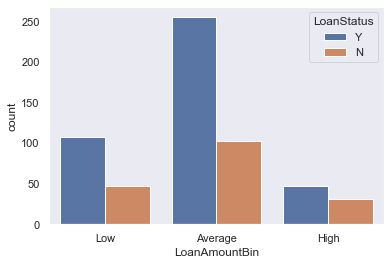

In [111]:
sns.countplot(x = "LoanAmountBin", hue = "LoanStatus", data = train)

### BIVARIATE FOR CONTINUOUS VARIABLE

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

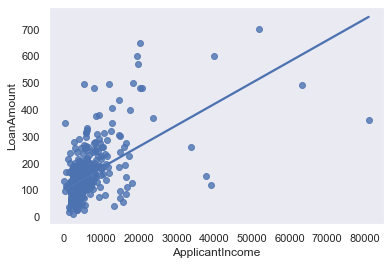

In [112]:
sns.regplot(x = "ApplicantIncome", y = "LoanAmount", data = train, ci = False)

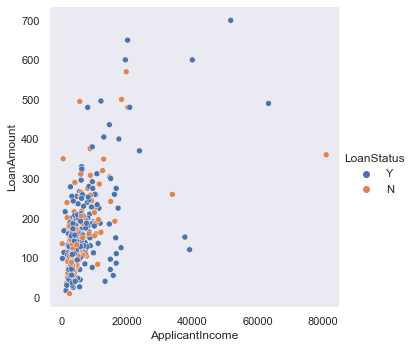

In [113]:
sns.relplot(x = "ApplicantIncome", y = "LoanAmount", hue = "LoanStatus", data = train, ci = False)

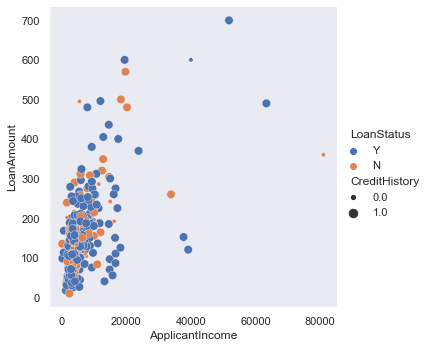

In [114]:
sns.relplot(x = "ApplicantIncome", y = "LoanAmount", hue = "LoanStatus", size = "CreditHistory", data = train, ci = False)

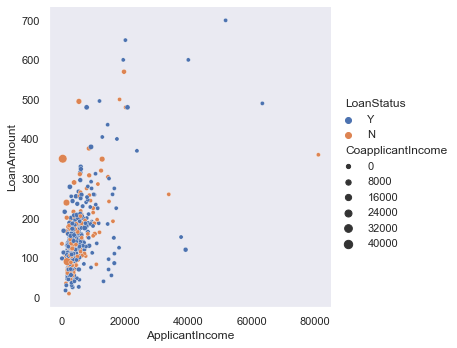

In [115]:
sns.relplot(x = "ApplicantIncome", y = "LoanAmount", hue = "LoanStatus", size = "CoapplicantIncome", data = train, ci = False)

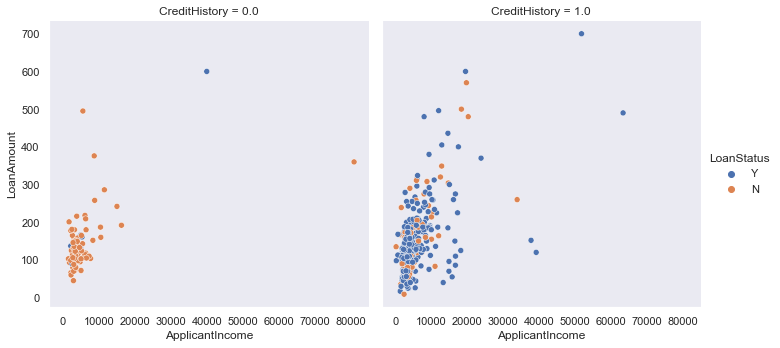

In [116]:
sns.relplot(x = "ApplicantIncome", y = "LoanAmount", hue = "LoanStatus", col = "CreditHistory", data = train, ci = False)

### TAKE COAPPLICANT INCOME AND COMPARE WITH LOAN AMOUNT AND GENDER

In [117]:
train.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus',
       'IncomeBin', 'LoanAmountBin'],
      dtype='object')

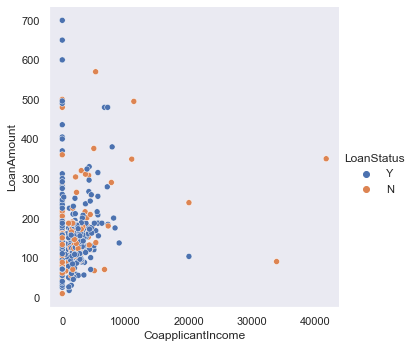

In [118]:
sns.relplot(x = "CoapplicantIncome", y = "LoanAmount", hue = "LoanStatus", data = train, ci = False)

# DATA WRANGLING

In [120]:
# DROP THE NEW VARIABLE OF BINS
train.drop(["IncomeBin", "LoanAmountBin"], axis = 1, inplace = True)

# DEPENDENTS

In [121]:
train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [123]:
# REPALCE 3+ IN DEPENDENTS VARIABLE WITH 3
train["Dependents"]. replace(to_replace = "3+", value = 3, inplace = True) 

In [124]:
train["Dependents"].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

# LOAN STATUS

In [125]:
# REPLACE Y AND N IN LOAN VARIABLE WITH 1 AND 0 RESPECTIVELY
train["LoanStatus"].replace(to_replace = ("Y", "N"), value = (1, 0), inplace = True)

In [126]:
train["LoanStatus"].value_counts()

1    422
0    192
Name: LoanStatus, dtype: int64

# MISSING VALUES AND OUTLIER TREATMENT

In [127]:
# CHECKING THE MISSING VALUES
train.isnull().sum()

LoanID                0
Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
CreditHistory        50
PropertyArea          0
LoanStatus            0
dtype: int64

In [129]:
s = train.isnull().sum()
[s > 0]

[LoanID               False
 Gender                True
 Married               True
 Dependents            True
 Education            False
 SelfEmployed          True
 ApplicantIncome      False
 CoapplicantIncome    False
 LoanAmount            True
 LoanAmountTerm        True
 CreditHistory         True
 PropertyArea         False
 LoanStatus           False
 dtype: bool]

In [130]:
s[s > 0]

Gender            13
Married            3
Dependents        15
SelfEmployed      32
LoanAmount        22
LoanAmountTerm    14
CreditHistory     50
dtype: int64

In [131]:
# REPLACE THE MISSING VALUES WITH THE MODE
train["Gender"].fillna(train["Gender"].mode()[0], inplace = True)

In [133]:
train["Married"].fillna(train["Married"].mode()[0], inplace = True)
train["SelfEmployed"].fillna(train["SelfEmployed"].mode()[0], inplace = True)

In [134]:
# DROP ROWS WHERE CREDIT HISTORY IS NULL
train = train[train.CreditHistory.notnull()]

In [135]:
train.shape

(564, 13)

In [136]:
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace = True)

C:\Users\nagal\AppData\Local\Temp\ipykernel_7048\4065274589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Dependents"].fillna(train["Dependents"].mode()[0], inplace = True)


In [138]:
train["LoanAmountTerm"].fillna(train["LoanAmountTerm"].mode()[0], inplace = True)

C:\Users\nagal\AppData\Local\Temp\ipykernel_7048\1989215967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["LoanAmountTerm"].fillna(train["LoanAmountTerm"].mode()[0], inplace = True)


In [139]:
train.LoanAmount.median(), train.LoanAmount.mean()

(127.0, 145.08839779005524)

In [140]:
# REPLACE MISSING VALUES
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace = True)

C:\Users\nagal\AppData\Local\Temp\ipykernel_7048\3780153727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace = True)


In [141]:
train.isnull().sum()

LoanID               0
Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64

# HANDLE OUTLIERS IN LOANAMOUNT, APPLICANTINCOME, COAPPLICANTINCOME

In [142]:
train["Income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]

C:\Users\nagal\AppData\Local\Temp\ipykernel_7048\386913302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]


<AxesSubplot:>

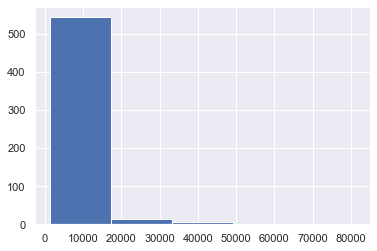

In [146]:
train["Income"].hist(bins = 5)

<AxesSubplot:xlabel='Income', ylabel='Count'>

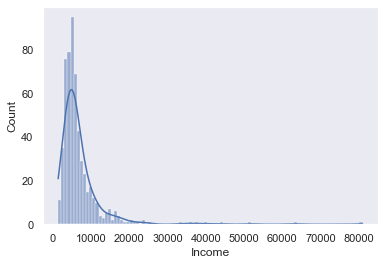

In [147]:
sns.histplot(data = train["Income"], kde = True)

<AxesSubplot:>

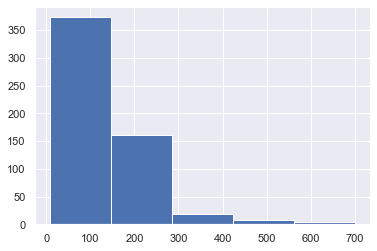

In [149]:
train["LoanAmount"].hist(bins = 5)

<AxesSubplot:>

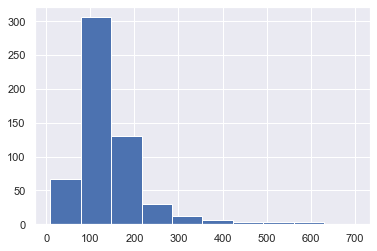

In [150]:
train["LoanAmount"].hist(bins = 10)

In [151]:
train["LoanAmountLog"] = np.log(train["LoanAmount"])

C:\Users\nagal\AppData\Local\Temp\ipykernel_7048\777567461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["LoanAmountLog"] = np.log(train["LoanAmount"])


<AxesSubplot:>

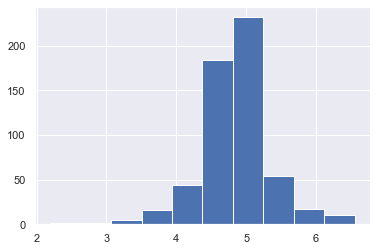

In [152]:
train["LoanAmountLog"].hist(bins = 10)

C:\Users\nagal\AppData\Local\Temp\ipykernel_7048\1951787997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["IncomeLog"] = np.log(train["Income"])


<AxesSubplot:>

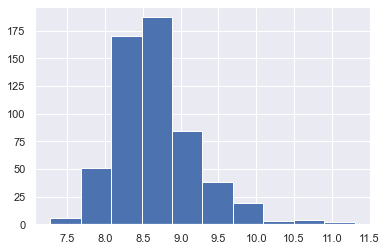

In [153]:
# REMOVE SKEWNESS IN INCOME VARIABLE BY USING LOG
train["IncomeLog"] = np.log(train["Income"])
train["IncomeLog"].hist(bins = 10)

In [156]:
train.drop(["LoanID", "LoanAmount", "ApplicantIncome", "CoapplicantIncome", "Income"], axis = 1, inplace = True)

C:\Users\nagal\AppData\Local\Temp\ipykernel_7048\3577287734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(["LoanID", "LoanAmount", "ApplicantIncome", "CoapplicantIncome", "Income"], axis = 1, inplace = True)


In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          564 non-null    object 
 1   Married         564 non-null    object 
 2   Dependents      564 non-null    object 
 3   Education       564 non-null    object 
 4   SelfEmployed    564 non-null    object 
 5   LoanAmountTerm  564 non-null    float64
 6   CreditHistory   564 non-null    float64
 7   PropertyArea    564 non-null    object 
 8   LoanStatus      564 non-null    int64  
 9   LoanAmountLog   564 non-null    float64
 10  IncomeLog       564 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [158]:
# PRINT CORR MATRIX TO UNDERSTAND THE RELATIONSHIP BETWEEN VARIABLES
matrix = train.corr()
print(matrix)

                LoanAmountTerm  CreditHistory  LoanStatus  LoanAmountLog  \
LoanAmountTerm        1.000000      -0.003735   -0.019790       0.084056   
CreditHistory        -0.003735       1.000000    0.561678      -0.025469   
LoanStatus           -0.019790       0.561678    1.000000      -0.028700   
LoanAmountLog         0.084056      -0.025469   -0.028700       1.000000   
IncomeLog            -0.049573       0.020070    0.025771       0.647745   

                IncomeLog  
LoanAmountTerm  -0.049573  
CreditHistory    0.020070  
LoanStatus       0.025771  
LoanAmountLog    0.647745  
IncomeLog        1.000000  


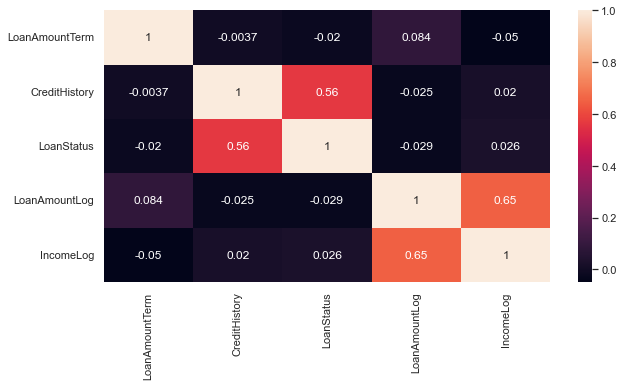

In [161]:
sns.heatmap(matrix, annot = True)
plt.gcf().set_size_inches(10, 5)

In [162]:
# SAVE DATAFRAME
train.to_csv("final_train.csv", index = False)